# Chapter 3: The Pandas essentials for data visualization

In [ ]:
import pandas as pd

## Get the data

In [ ]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

In [ ]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

## Long vs. wide data

In [ ]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

In [ ]:
mortality_wide.plot()

## Plot the data

In [ ]:
mortality_data.plot()

In [ ]:
mortality_wide.plot()

## Parameters

### Three Basic Parameters of Pandas plot() Method
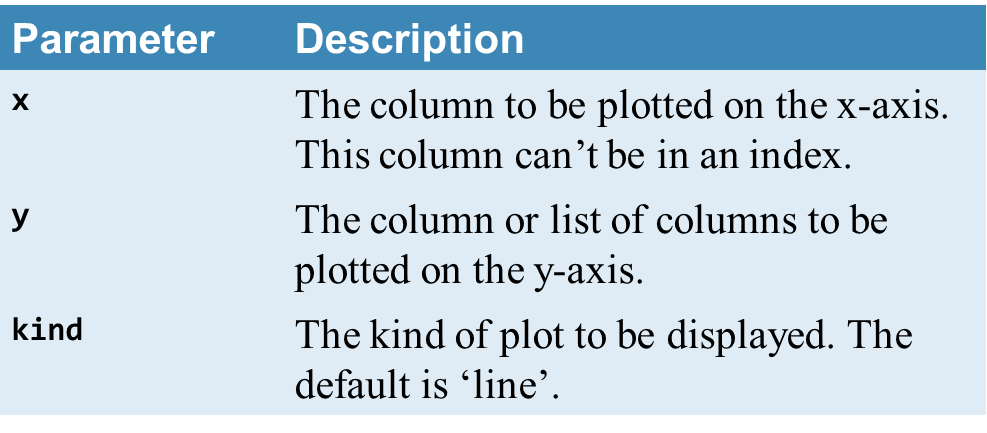

In [ ]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

In [ ]:
mortality_wide.plot.line(y=['01-04 Years','15-19 Years'])

## Line and area plots

In [ ]:
mortality_wide.plot.line()

In [ ]:
mortality_wide.plot.area()

## Scatter plots

In [ ]:
mortality_data.plot.scatter(x='Year', y='DeathRate')

In [ ]:
# mortality_data.plot.scatter()   # Error: must have x and y parameters

In [ ]:
# mortality_wide.plot.scatter(x='Year',y='Death_Rate') # Error: 'Year' is in an index

In [ ]:
import seaborn as sns
sns.scatterplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

## Bar plots

In [ ]:
mortality_wide.query('Year in (1900,2000)').plot.bar()

In [ ]:
mortality_wide.query('Year in (1900,2000)').plot.barh()

## Histogram and density plots

In [ ]:
mortality_data.plot.hist(y='DeathRate',bins=8)

In [ ]:
mortality_data.plot.density(y='DeathRate')

In [ ]:
mortality_wide.plot.density()   

## Box and pie plots

In [ ]:
mortality_wide.plot.box()

In [ ]:
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

## Improve the appearance

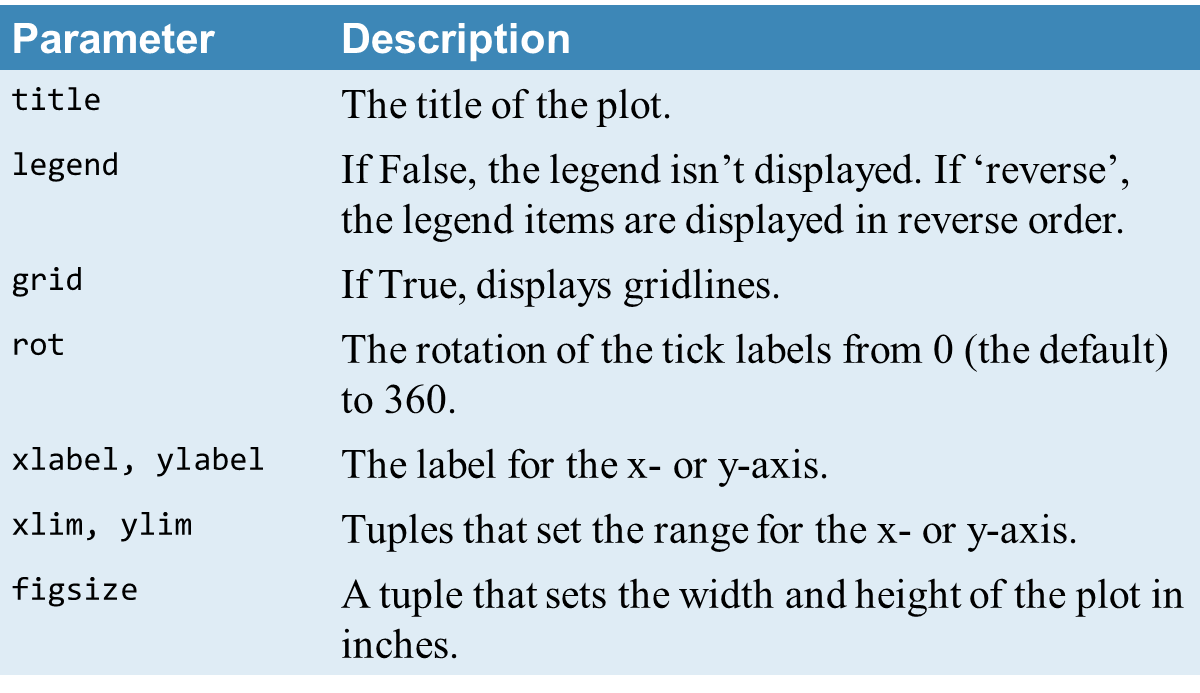

In [ ]:
mortality_wide.plot.line(title='Child Mortality: 1900-2018',
                         ylabel='Deaths per 100,000', grid=True, rot=45)

In [ ]:
mortality_wide.plot.line(title='Child Mortality: 2000-2018',
     ylabel='Deaths per 100,000', figsize=(8,4), grid=True, rot=45,
     xlim=(2000,2018), ylim=(0,100))

## Subplots

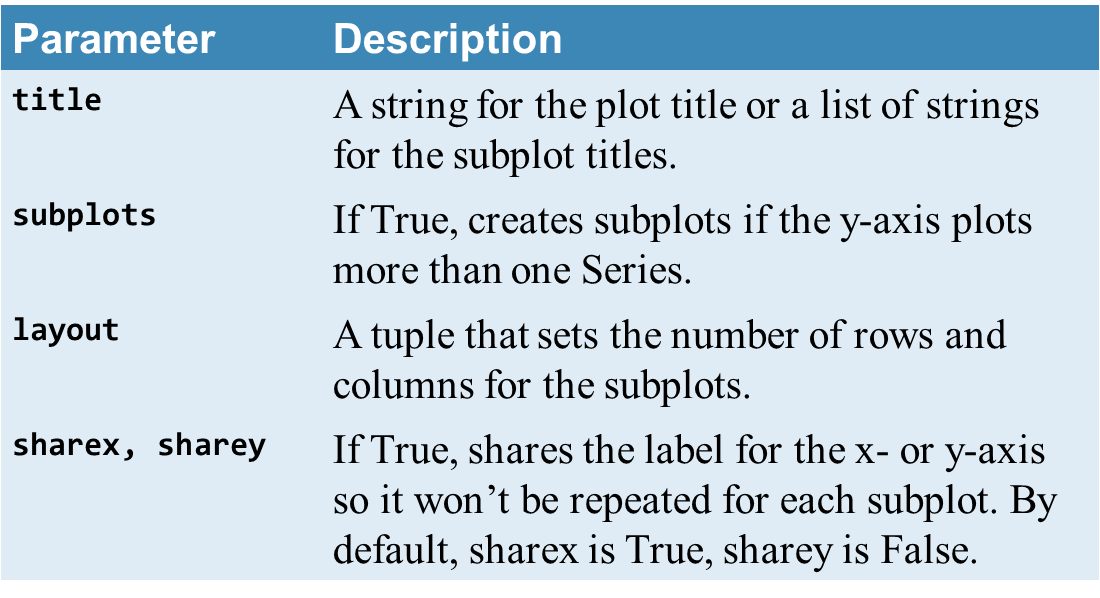

In [ ]:
mortality_wide.plot.line(
    title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
    ylabel='Deaths per 100,000', sharey=True,
    grid=True, rot=45, xlim=(1900,1950), legend=False,
    subplots=True, layout=(2,2), figsize=(10,10))

## Chaining

In [ ]:
mortality_data.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
     .plot.barh()

In [ ]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std']).plot(ylabel='Deaths per 100,000')